In [164]:
%matplotlib inline
import ipywidgets 
import numpy as np
import matplotlib.pyplot as plt
from control import matlab
import control
import scipy
#from IPython.display import display

# Circuit analysis using Laplace transform and Bode diagrams


# Example 1: RC first order low pass filter

<img src="images/example1.png" width="700" height="400">

$$V_{out}(s)=\frac{1}{RCs+1}V_{in}(s)$$

$$v_{in}(t)=v_in \Rightarrow V_{in}(s)=\frac{v_{in}}{s}$$

<img src="images/example1vout.png" width="250" height="400">




In [165]:
N = 500 # number of points
tend = 10 # end time
v_in = 1;
t = np.linspace(0,tend,N) # time vector
u = v_in*np.zeros(N)
u[int(np.floor(N/4)):]=v_in; # input 
def plt_RC_step(R,C,u,t):
    sys = control.tf(1,[R*C,1]) # creates transfer function system
    t, yout, xout = control.forced_response(sys, t, u, 0) # simulates system response to input u
    plt.figure(figsize=(16,4))
    plt.plot(t,u,'k--',linewidth=2,label='v_in(t)')
    plt.plot(t,yout,'b',linewidth =2,label='v_out(t)')
    plt.grid()
    plt.xlabel("Time (s)")
    plt.legend()

In [166]:
wR = ipywidgets.FloatSlider(min =.1,max=2,step=.01,value=.5,description='Resistance R [Ohm]')
wC = ipywidgets.FloatSlider(min =.1,max=2,step=.01,value=.5,description='Capacitance C[F]')

## Step response 
Experiment system step response with different values of $R$ and $C$

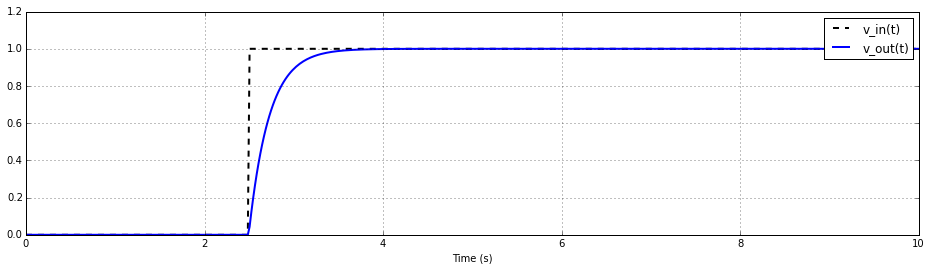

In [167]:
ipywidgets.interact(plt_RC_step, R=wR, C = wC, u=ipywidgets.fixed(u), t=ipywidgets.fixed(t));


# Example 2: RLC second order low pass filter

<img src="images/example2.png" width="700" height="400">

$$V_{out}(s)=\frac{1}{LCs^2 + \frac{L}{R}s +1}V_{in}(s)$$

$$v_{in}(t)=v_in \Rightarrow V_{in}(s)=\frac{v_{in}}{s}$$


In [168]:
N = 500 # number of points
tend = 10 # end time
v_in = 1;
t = np.linspace(0,tend,N) # time vector
u = v_in*np.zeros(N)
u[int(np.floor(N/4)):]=v_in; # input 
def plt_LRC_step(L,R,C,u,t):
    sys = control.tf(1,[L*C,L/R, 1]) # creates transfer function system
    t, yout, xout = control.forced_response(sys, t, u, 0) # simulates system response to input u
    # figures
    plt.figure(figsize=(16,4))
    plt.plot(t,u,'k--',linewidth=2,label='v_in(t)')
    plt.plot(t,yout,'b',linewidth =2,label='v_out(t)')
    plt.grid()
    plt.xlabel("Time (s)")
    plt.legend()
    #plt.axis([0, 10, -0.1, 1.1])
    #plt.show()

## Step response

Experiment system step response with different values of $L$, $R$ and $C$

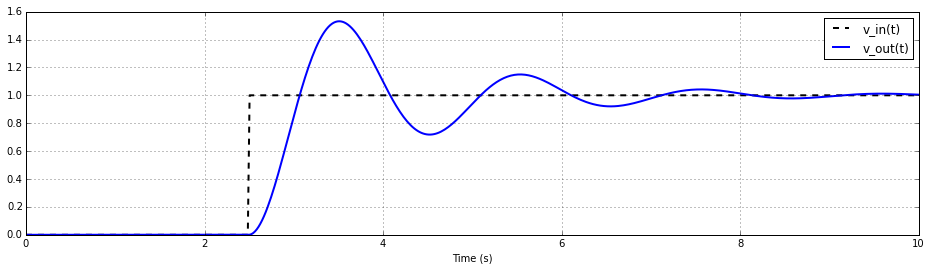

In [169]:
wL = ipywidgets.FloatSlider(min =0.1,max=2,step=.01,value=.5,description='Inductance L[H]')
wR = ipywidgets.FloatSlider(min =1,max=10,step=.01,value=4,description='Resistance R [Ohm]')
wC = ipywidgets.FloatSlider(min =0.01,max=.5,step=.01,value=.2,description='Capacitance C[F]')
ipywidgets.interact(plt_LRC_step, L=wL, R=wR, C = wC,u=ipywidgets.fixed(u), t=ipywidgets.fixed(t));

# Bode diagrams

<img src="images/bode2.png" width="700" height="400">


# Bode diagrams of diverse transfer functions

## First order low pass filter
 
 $$H(s)=\frac{1}{s+1}$$

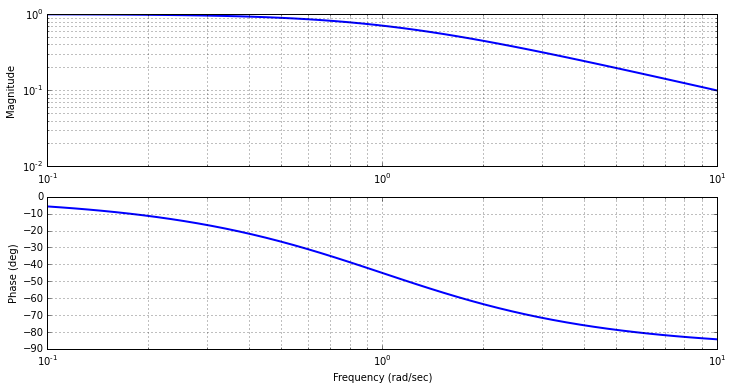

In [170]:
sys = control.tf(1,[1,1])
plt.figure(figsize=(12,6)) 
control.bode(sys,linewidth=2);

In [171]:
def pltLRCbode(omega,z):
    sys = control.tf(omega**2,[1,2*z*omega,omega**2]) # creates transfer function
    plt.figure(figsize=(12,6)) 
    #mag, phase, w = control.bode(sys,np.logspace(1,3,500),linewidth=2) # Bode diagram
    mag, phase, w = control.bode(sys,linewidth=2) # Bode diagram

In [172]:
womega = ipywidgets.FloatSlider(min =0.1,max=1000,step=.1,value=100,description='Natural frequency w_n [rads/s]');
wz = ipywidgets.FloatSlider(min =0,max=1.2,step=.01,value=.1,description='Damping ratio z');

## Second order filter

 $$H(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_n+\omega_n^2}$$
 

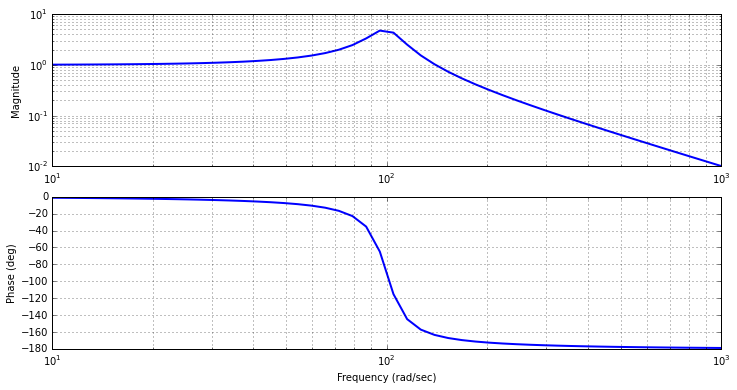

In [173]:
ipywidgets.interact(pltLRCbode, omega=womega, z=wz);

# Bandpass filter 

 $$H(s)=\frac{s}{s^2+s+1}$$

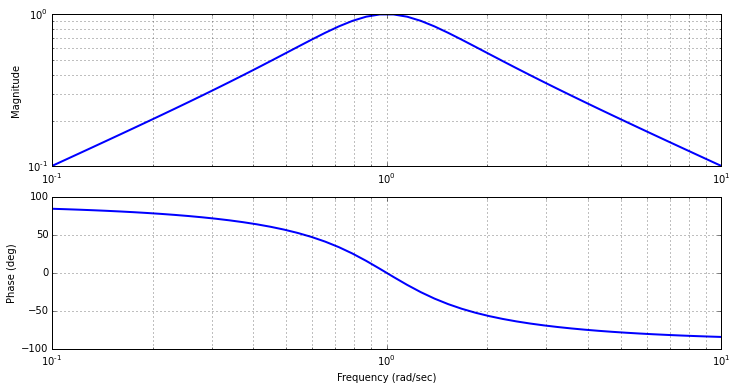

In [174]:
sys = control.tf([1 ,0],[1, 1 ,1])
plt.figure(figsize=(12,6)) 
control.bode(sys,linewidth=2);

# Notch filter
 
 $$H(s)=\frac{s^2+1}{s^2+s+1}$$

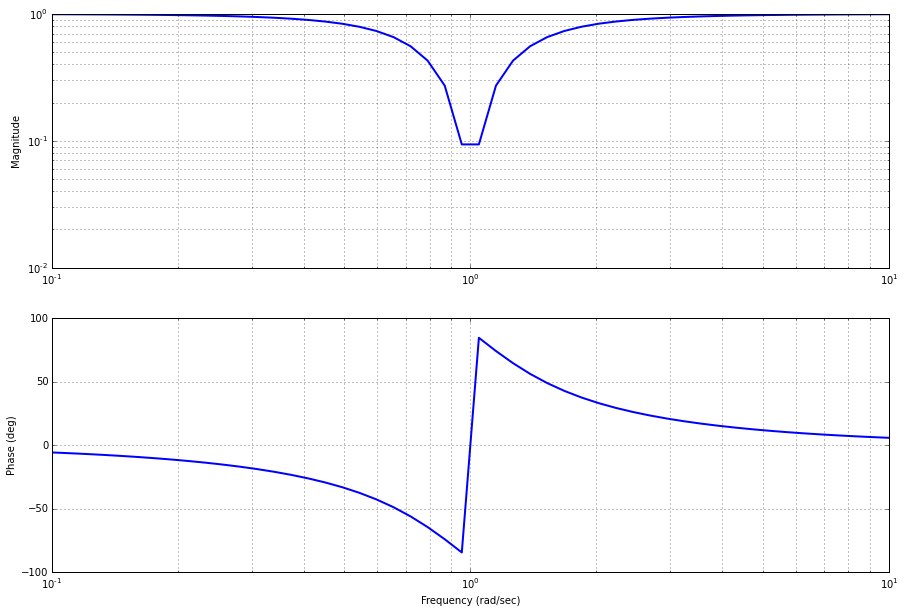

In [175]:
sys = control.tf([1 ,0,1],[1, 1 ,1])
plt.figure(figsize=(15,10)) 
control.bode(sys,linewidth=2);